In [ ]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "notebook", "muted"])
plt.rcParams["text.usetex"] = False

In [11]:
import sklearn

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import QuantileRegressor

def run_ex():
    def f(x):
        """The function to predict."""
        return x * np.sin(x)
    
    
    rng = np.random.RandomState(42)
    X = np.atleast_2d(rng.uniform(0, 10.0, size=1000)).T
    expected_y = f(X).ravel()
    
    sigma = 0.5 + X.ravel() / 10
    noise = rng.lognormal(sigma=sigma) - np.exp(sigma**2 / 2)
    y = expected_y + noise
    
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=10)
    X_poly = poly.fit_transform(X)
    
    
    # Fit a quantile regression model
    def fit_quantile(x, y, quantile):
        model = QuantileRegressor(quantile=alpha)
        model.fit(x, y)
        return model

    alphas=[0.05, 0.5, 0.95]
    models = {}
    for alpha in alphas:
        models[alpha] = fit_quantile(X_poly, y, alpha)
        
    # Make predictions
    X_new = np.linspace(0, 10, 100)[:,np.newaxis]
    # X_new = np.array([[6], [7]])

    y_preds = {}
    for alpha in alphas:
        y_preds[alpha] = models[alpha].predict(poly.transform(X_new))
    
    # print(y_pred)

    plt.plot(X_train, y_train, 'o')
    for alpha in alphas:
        plt.plot(X_new, y_preds[alpha])

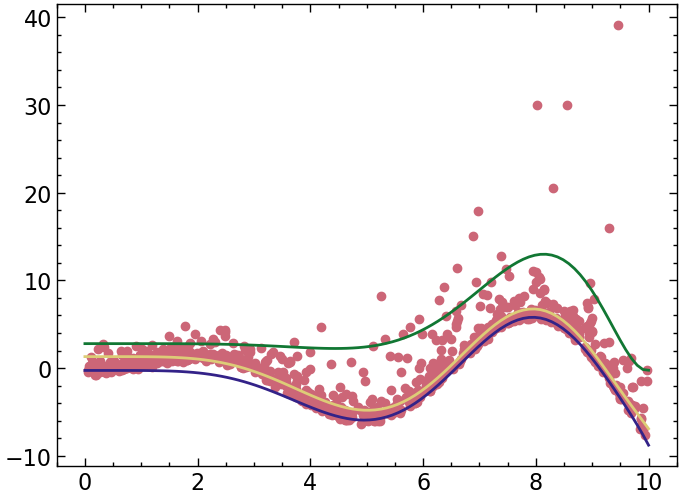

In [13]:
run_ex()